# Objective 1: *Quantify the contribution of secondary electron emission to Townsend discharges.*

To decorrelate the gas constant $A$ and secondary electron emission $\gamma$, we propose experiments with identical electrode material and geometry, with varying gas compositions of Air, CO2, Ar, and CH4. The purpose of this study is to compare a well-documented inert gas, Ar, to the dominant components in the atmospheres of Earth, Mars, and Titan (i.e., air, CO2, and CH4, respectively). Paschen’s law requires two gas constants $A$ and $B$ to characterize the Paschen curve of a given gas. Raizer (1991; p. 56) provides a table of values for $A$ and $B$ and states that “The constants $A$ and $B$ are determined by approximating the experimental curves.” The method for approximating these values uses the curve’s theoretical minimum $\rm (pd_{min},V_{min})$ known as Stoletow point. It calculates $A$ and $B$ as follows: $B=(V/pd)_{min}$, and $A = e/pd_{min}\ln(1/\gamma+1)$, where e = 2.72 is the base of natural logarithms (Fridman, 2023). However, attempting to isolate the influence of the gas constant $A$, and secondary electron emission $\gamma$ is impossible without further information. We will compare the ratio between the theoretical approximation of gas constant $A$ via the mean free path length, $A = 1/\lambda p_{min}$, to the experimentally solved values of $A$ between 2 gases Equation (6). If the ratios are the same across each gas, then there is no dependence on gas for the secondary electron emission. On the other hand, a noteworthy variation between the ratios will show that the secondary electron emission does depend on the gas. The values of $B$ can be straightforwardly compared to experimental values in the peer-reviewed literature.

$\left.\frac{A_1}{\ln\left(1+\frac{1}{\gamma}\right)}\middle/\frac{A_2}{\ln\left(1+\frac{1}{\gamma}\right)}\right. = \left.\frac{1}{\lambda_1p}\middle/\frac{1}{\lambda_2p}\right.$

In [1]:
import matplotlib.pyplot as plt
from CurveFit import *
import pandas as pd
import numpy as np

In [2]:
N2_5mm = pd.read_csv('202565_N2_5mm.csv')
Ar_5mm = pd.read_csv('2025115_Ar_5mm.csv')

stoletow: (0.5339391923898813pd,228.30677024223326V)

stoletow: (0.6751303894595699pd,399.11889151232083V)



/Users/sethgerow/Desktop/Programming/github/SAIL-Plasma/BeAMED/Test Scripts/Beamed_data_11102025/CurveFit.py:141: RankWarning: Polyfit may be poorly conditioned
  poly_right = np.polyfit(right_pd, right_v, 1)
/Users/sethgerow/Desktop/Programming/github/SAIL-Plasma/BeAMED/Test Scripts/Beamed_data_11102025/CurveFit.py:166: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x_fit[stoletow_point_index], y_fit[stoletow_point_index], marker = '+',s = 400, ec = 'black', color = 'black', label = f"{label} Stoletow Point", zorder=7)


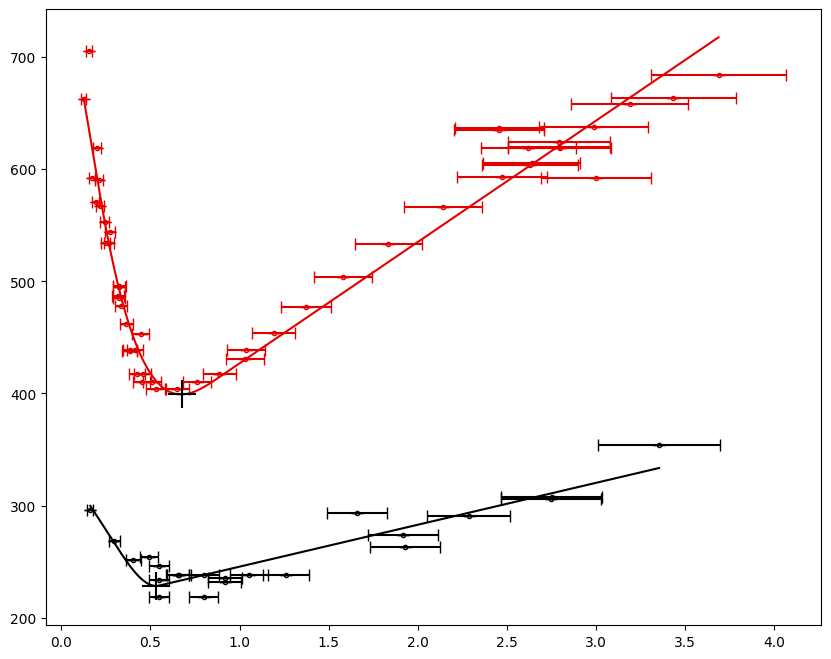

In [6]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

v_5Ar, pd_5Ar = plot_data(ax, Ar_5mm, label = "Ar: 5mm Gap", color = 'xkcd:black')
v_5N, pd_5N = plot_data(ax, N2_5mm, label = "N2: 5mm Gap", color = 'xkcd:red')

coeffs_5mmAr, (pd_min_Ar, v_min_Ar) = plot_fit(ax, pd_5Ar, v_5Ar, left_knot_range=0.3, right_knot_range=0.3, label = 'Ar: 10mm', show_knots=False, show_stoletow=True, label_regions=False, color='xkcd:black')
coeffs_5mmN2, (pd_min_N2, v_min_N2) = plot_fit(ax, pd_5N, v_5N, left_knot_range=0.3, right_knot_range=0.3, label = 'N2: 10mm', show_knots=False, show_stoletow=True, label_regions=False, color='xkcd:red')

In [10]:
gg = 0.01 #SEE
A_Ar = (math.exp(1)/pd_min_Ar) * math.log(1 + (1/gg))
A_N2 = (math.exp(1)/pd_min_N2) * math.log(1 + (1/gg))

print(f"Ratio of Air to Ar A: {A_N2}/{A_Ar} = {A_N2/A_Ar}")

Ratio of Air to Ar A: 18.581889414162386/23.495556078074216 = 0.7908682540824302
